<a href="https://colab.research.google.com/github/dla0510/Algorithm/blob/main/AI_teamproject_developed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Team Project - Team 4

* Submission date: **2021/12/11 Tue**

# Introduction

With Internet usage exceeding 91%, Internet access has become an essential part of life. However, this situation has caused many network security problems. Network security problems refer to illegal information leakage, service obstruction, and system vulnerability through various protocols or networks. Many intrusion detection systems have been developed to solve these security problems. Numerous preprocessing processes must be applied to intrusion detection systems to find useful information and data patterns. So various deep learning-based algorithms such as MLP and CNN began to appear. Among them, a model that combines CNN and LSTM that extract spatial and temporal information of network traffic is known to perform better than a single CNN or a single LSTM model. Therefore, we try to create a better model by applying the CNN-LSTM model to solve the class imbalance and to increase accuracy for a given network intrusion detection problem.




# Data

KDD-99 dataset which is representative intrusion data was used.

(http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

Since 1999, KDD-99 dataset  has been the most widely used data set for the evaluation of traffic classification methods. The KDD-99 dataset was provided which consists of a wide variety of intrusions simulated in a military network environment. each intrusion is labelled as either normal or as an attack with exactly one specific attack type. The attacks in KDD-99 data set fall in four categories as following:
1) Denial of Service Attack (DOS): is an attack in which the attacker makes some computing or memory resource too busy or too full to handle legitimate requests, or denies legitimate users access to a machine.
2) User to Root Attack (U2R): is a class of exploit in which the attacker starts out with access to a normal user account on the system (perhaps gained by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system.
3) Remote to Local Attack (R2L): occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine.
4) Probing attack: is an attempt to gather information about a network of computers for the apparent purpose of circumventing its security controls.
 
Attack category	Data set
	KDDCup 99
Normal	972780(19.86%)
DOS	3883370(79.28%)
Probe	41102(0.84%)
R2L	1126(0.02%)
U2R	52
Table 1. Detailed Composition of KDD Cup99
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features).
This data can be classified into normal and 4 attack types, a total of 5 classes.

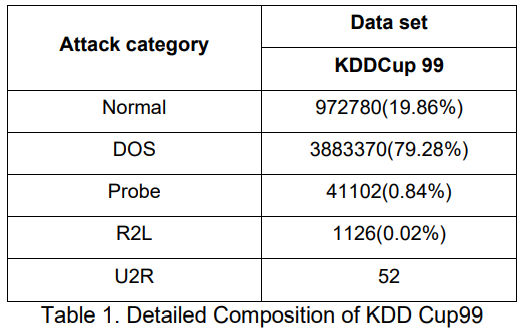


For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features).
This data can be classified into normal and 4 attack types, a total of 5 classes.


In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


#	Preprocessing

Data preprocessing has 2 processes: encoding and normalization.
Label data which is divided into 22 attack types and 1 normal type were classified into 5 classes (4 attack types, 1 normal type).
After that, data composed of strings such as protocol_type, service, flag, and label were changed as continuous int data through label encoding.
The range of values between successive data characteristics varies enormously. For example, the range of the num_root type is [0,7468], and the range of the num_shell is [0,5]. As such, the range of the minimum and maximum values varies greatly depending on types. In order to facilitate arithmetic operations, the range of each value was uniformly mapped by applying a normalization processing method.


In [ ]:
from __future__ import print_function
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Lambda
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

import numpy
import h5py
from tensorflow.keras import callbacks
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
from numpy import nan
import datetime
import sys
import os
import matplotlib.pyplot as plt
import json
import sqlalchemy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label']
data = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/kddcup.data',names=columns)

In [ ]:
change_value_dict = {'back.':'dos','buffer_overflow.':'u2r','ftp_write.':'r2l','guess_passwd.':'r2l','imap.':'r2l','ipsweep.':'probe','land.':'dos','loadmodule.':'u2r','multihop.':'r2l','neptune.':'dos','nmap.':'probe','perl.':'u2r','phf.':'r2l','pod.':'dos','portsweep.':'probe','rootkit.':'u2r','satan.':'probe','smurf.':'dos','spy.':'r2l','teardrop.':'dos','warezclient.':'r2l','warezmaster.':'r2l','normal.':'normal'}
data = data.replace({'label':change_value_dict})

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['label'] = LE.fit_transform(data['label']) 
LE = LabelEncoder()
data['protocol_type'] = LE.fit_transform(data['protocol_type'])
LE = LabelEncoder()
data['service'] = LE.fit_transform(data['service']) 
LE = LabelEncoder()
data['flag'] = LE.fit_transform(data['flag']) 

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,1
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,1
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,1
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,1,24,9,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,1
4898427,0,1,24,9,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,1
4898428,0,1,24,9,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,1
4898429,0,1,24,9,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
# split train set&test set
x, x_test, y, testY = train_test_split(data.iloc[:,:-1],data.iloc[:,-1], test_size=0.1, random_state=10) #9:1 비율

# split train set&validation set
X, T, Y, C = train_test_split(x,y, test_size=0.2, random_state=10) #8:2 ratio


#Normalize
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

scaler = Normalizer().fit(x_test)
testX = scaler.transform(x_test)

y_train = np.array(Y)
y_valid = np.array(C)
y_test = np.array(testY)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_valid = np.reshape(testT, (testT.shape[0],testT.shape[1],1))
X_test = np.reshape(testX, (testX.shape[0],testX.shape[1],1))

# Model Configuration

* Vinayakumar et al. (2017) showed that at least 400 epochs of learning were required to learn the low frequency classes r2l and u2r at a sufficient level as a result of experimenting with several CNN-based transformation models by applying a learning rate between [0.01-0.5].

* At this time, the lower the learning rate, the better the performance, but it was said that more epochs were needed to learn the low frequency class.

* Therefore, the final result of learning for 1000 epochs with a learning rate of 0.1 was as follows.

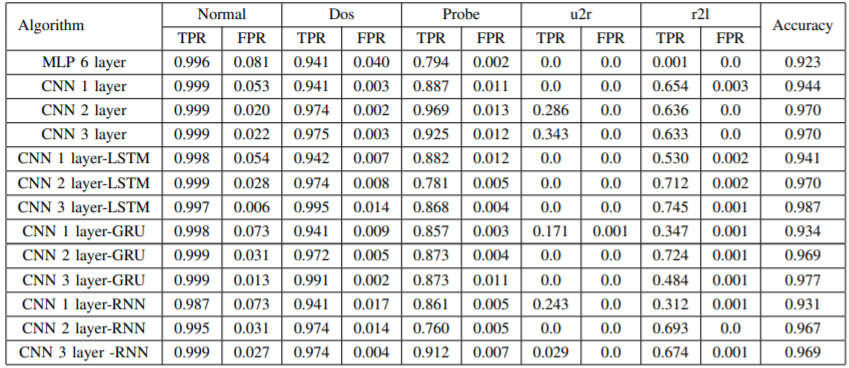

* We constructed the base model with the CNN 3 layer+LSTM model, which had the highest performance on the above paper.
And we tried to improve the model to learn the low frequency class better with lower epochs (less time).
To this end, hyperparameter tuning and weight balancing technique are applied.
The following is the result of training the base model and the developed models.
Due to resource limitations, the epoch is set to 50 for all model.

# 0. base model (CNN_LSTM model with reference to the paper)

CNN_LSTM_base.hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.
Epoch 1/50
110215/110215 [==============================] - 527s 5ms/step - loss: 0.6221 - accuracy: 0.7770 - val_loss: 0.5619 - val_accuracy: 0.7928
Epoch 2/50
110215/110215 [==============================] - 522s 5ms/step - loss: 0.6200 - accuracy: 0.7777 - val_loss: 0.5717 - val_accuracy: 0.7928
Epoch 3/50
110215/110215 [==============================] - 522s 5ms/step - loss: 0.6207 - accuracy: 0.7774 - val_loss: 0.7289 - val_accuracy: 0.7928
Epoch 4/50
110215/110215 [==============================] - 516s 5ms/step - loss: 0.6203 - accuracy: 0.7779 - val_loss: 0.5720 - val_accuracy: 0.7928
Epoch 5/50
110215/110215 [==============================] - 520s 5ms/step - loss: 0.6200 - accuracy: 0.7779 - val_loss: 0.6292 - val_accuracy: 0.7928
Epoch 6/50
110215/110215 [==============================] - 522s 5ms/step - loss: 0.6210 - accuracy: 0.7774 - val_loss: 0.6723 - val_accuracy: 0.7928
Epoch 7/50
110215/110215 [=========================

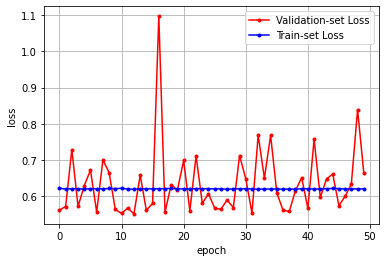

15308/15308 [==============================] - 41s 3ms/step - loss: 0.6620 - accuracy: 0.7938

Loss: 0.66, Accuracy: 79.38%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.79384   1.00000   0.88507    388858
           1    0.00000   0.00000   0.00000     96754
           2    0.00000   0.00000   0.00000      4111
           3    0.00000   0.00000   0.00000       113
           4    0.00000   0.00000   0.00000         8

    accuracy                        0.79384    489844
   macro avg    0.15877   0.20000   0.17701    489844
weighted avg    0.63018   0.79384   0.70261    489844



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_name = 'CNN_LSTM_base'

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(64))
cnn.add(Dense(5, activation="softmax"))

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.1)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

# train
checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max') #saving model whenver performance increases
csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False) #recording log
history = cnn.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger])
cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5") #save model

print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #evaluation with validation set

#loss graph

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

'''
# Test result
y_pred=cnn.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)

loss, accuracy = cnn.evaluate(X_test, y_test) #performance evaluation with test set
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))
'''

In [ ]:
#Test Result
model_name = 'CNN_LSTM_base'

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(64))
cnn.add(Dense(5, activation="softmax"))

cnn.load_weights("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5")

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.1)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

y_pred_base=cnn.predict(X_test) 
y_pred=np.argmax(y_pred_base,axis=1)

loss, accuracy = cnn.evaluate(X_test, y_test) #performance evaluation with test set
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

15308/15308 [==============================] - 41s 3ms/step - loss: 0.6620 - accuracy: 0.7938

Loss: 0.66, Accuracy: 79.38%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.79384   1.00000   0.88507    388858
           1    0.00000   0.00000   0.00000     96754
           2    0.00000   0.00000   0.00000      4111
           3    0.00000   0.00000   0.00000       113
           4    0.00000   0.00000   0.00000         8

    accuracy                        0.79384    489844
   macro avg    0.15877   0.20000   0.17701    489844
weighted avg    0.63018   0.79384   0.70261    489844



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

print(TPR)
print(FPR)

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


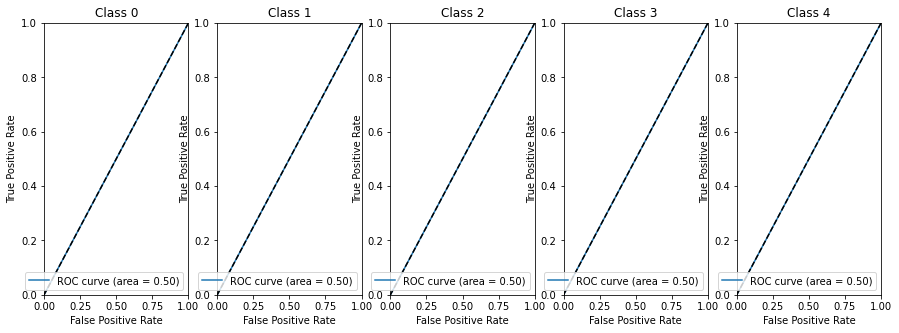

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_test_ROC = to_categorical(testY)

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_ROC[:, i], y_pred_base[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(5)):
    plt.subplot(151+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

In [ ]:
print(roc_auc_score(y_test_ROC,y_pred_base,average="macro",multi_class='raise'))

0.5


# 1. Hyperparameter tuning, structure change

In [ ]:
model_name = 'CNN_LSTM_tuning'

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(64))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

# train
checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max') #Checkpoint
csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False)
history = cnn.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger])
cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5") 


print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #evaluation with validation set


#loss graph

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/50
110215/110215 [==============================] - 581s 5ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 2/50
110215/110215 [==============================] - 578s 5ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 3/50
110215/110215 [==============================] - 581s 5ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 4/50
110215/110215 [==============================] - 581s 5ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 5/50
110215/110215 [==============================] - 573s 5ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 9.4780e-04 - val_accuracy: 0.9998
Epoch 6/50
110215/110215 [==============================] - 590s 5ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 9.2297e-04 - val_accuracy: 0.9998
Epoch 7/50
110215/110215 [==============================] - 590s 5ms/step - loss: 0.0012 - a

Epoch 1/5
110215/110215 [==============================] - 547s 5ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 2/5
110215/110215 [==============================] - 542s 5ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 3/5
110215/110215 [==============================] - 552s 5ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 9.7418e-04 - val_accuracy: 0.9998
Epoch 4/5
110215/110215 [==============================] - 541s 5ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 5/5
27554/27554 [==============================] - 72s 3ms/step - loss: 0.0013 - accuracy: 0.9997

Accuracy: 0.9997


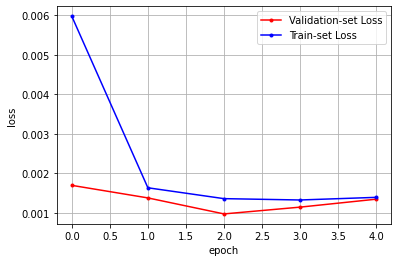

15308/15308 [==============================] - 40s 3ms/step - loss: 0.0013 - accuracy: 0.9997

Loss: 0.00, Accuracy: 99.97%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.99990   0.99993   0.99992    388858
           1    0.99920   0.99959   0.99940     96754
           2    0.99681   0.98808   0.99243      4111
           3    0.86111   0.82301   0.84163       113
           4    0.00000   0.00000   0.00000         8

    accuracy                        0.99971    489844
   macro avg    0.77141   0.76212   0.76667    489844
weighted avg    0.99969   0.99971   0.99970    489844



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Hyperparameter tuning (learning_rate to 0.001), adding dropout layer
model_name = 'CNN_LSTM_tuning'

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(64))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

# train
checkpointer = callbacks.ModelCheckpoint(filepath='CNN_LSTM_tuning_best_ckpt.hdf5', verbose=1, save_best_only=True, monitor='val_accuracy',mode='max') #Checkpoint
csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False)
history = cnn.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger])
cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5")

print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #evaluation with validation set


#loss graph

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

'''
# Test Result
y_pred=cnn.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)

loss, accuracy = cnn.evaluate(X_test, y_test) #performance evaluation with test set
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))
'''

In [ ]:
#Test Result
model_name = 'CNN_LSTM_tuning'

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(64))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

cnn.load_weights("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5")

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

y_pred_tuning=cnn.predict(X_test) 
y_pred=np.argmax(y_pred_tuning,axis=1)

loss, accuracy = cnn.evaluate(X_test, y_test) #performance evaluation with test set
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

15308/15308 [==============================] - 42s 3ms/step - loss: 0.0013 - accuracy: 0.9997

Loss: 0.00, Accuracy: 99.97%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.99990   0.99993   0.99992    388858
           1    0.99920   0.99959   0.99940     96754
           2    0.99681   0.98808   0.99243      4111
           3    0.86111   0.82301   0.84163       113
           4    0.00000   0.00000   0.00000         8

    accuracy                        0.99971    489844
   macro avg    0.77141   0.76212   0.76667    489844
weighted avg    0.99969   0.99971   0.99970    489844



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

print(TPR)
print(FPR)

[0.99993314 0.99958658 0.98808076 0.82300885 0.        ]
[3.76289783e-04 1.95883894e-04 2.67636747e-05 3.06290596e-05
 0.00000000e+00]


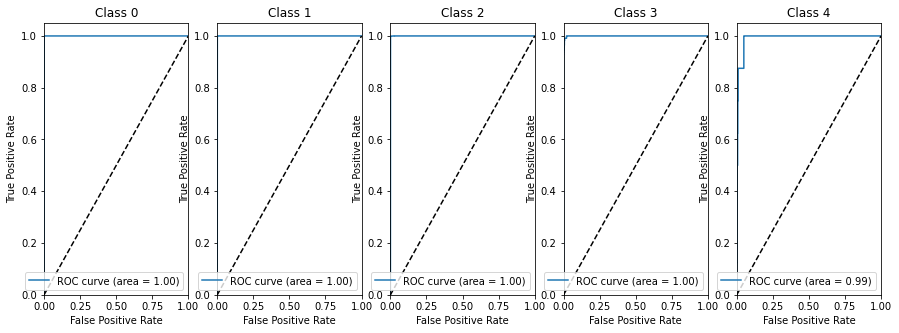

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_test_ROC = to_categorical(testY)

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_ROC[:, i], y_pred_tuning[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(5)):
    plt.subplot(151+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

In [ ]:
print(roc_auc_score(y_test_ROC,y_pred_tuning,average="macro",multi_class='raise'))

0.997915130397937


# 2. Class Weight(Weight Balancing)

* In imbalanced data, learning tends to focus more on the majority class in general.
* Weight balancing is a method of assigning weights to the loss value so that learning can be focused more on data samples belonging to the minority class.

In [ ]:
#Class Weight
import numpy as np
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(Y),y=Y)
class_weight = dict(zip(np.unique(Y), class_weight))
class_weight

{0: 0.2523148868854936,
 1: 1.0064956902013293,
 2: 23.835997945446188,
 3: 870.4021717670287,
 4: 20039.03181818182}

CNN_LSTM_class_weight.hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.
Epoch 1/50
110215/110215 [==============================] - 556s 5ms/step - loss: 1.1594 - accuracy: 0.8627 - val_loss: 0.2672 - val_accuracy: 0.9013
Epoch 2/50
110215/110215 [==============================] - 549s 5ms/step - loss: 0.8838 - accuracy: 0.9393 - val_loss: 0.4830 - val_accuracy: 0.7979
Epoch 3/50
110215/110215 [==============================] - 548s 5ms/step - loss: 1.6908 - accuracy: 0.8988 - val_loss: 0.1515 - val_accuracy: 0.9748
Epoch 4/50
110215/110215 [==============================] - 552s 5ms/step - loss: 3.6938 - accuracy: 0.7996 - val_loss: 0.2257 - val_accuracy: 0.9608
Epoch 5/50
110215/110215 [==============================] - 555s 5ms/step - loss: 3.2578 - accuracy: 0.4071 - val_loss: 0.9969 - val_accuracy: 0.6545
Epoch 6/50
110215/110215 [==============================] - 554s 5ms/step - loss: 2.6075 - accuracy: 0.6220 - val_loss: 0.7132 - val_accuracy: 0.7433
Epoch 7/50
110215/110215 [=================

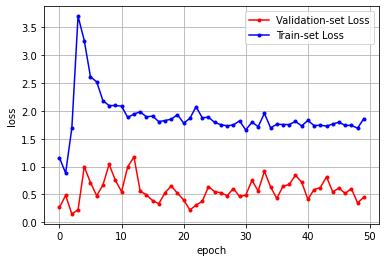

15308/15308 [==============================] - 42s 3ms/step - loss: 0.4503 - accuracy: 0.9863

Loss: 0.45, Accuracy: 98.63%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.98894   0.99703   0.99297    388858
           1    0.97937   0.98531   0.98233     96754
           2    0.22845   0.02578   0.04634      4111
           3    0.00000   0.00000   0.00000       113
           4    0.00000   0.00000   0.00000         8

    accuracy                        0.98632    489844
   macro avg    0.43935   0.40162   0.40433    489844
weighted avg    0.98042   0.98632   0.98268    489844



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_name = 'CNN_LSTM_class_weight'

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(64))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

# train
checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False)
history = cnn.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger],class_weight=class_weight)
cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5")


print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1]))


#loss graph

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
# Test Result

model_name = 'CNN_LSTM_class_weight'

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(64))
cnn.add(Dense(5, activation="softmax"))

cnn.load_weights("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5")

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

y_pred_class_weight=cnn.predict(X_test) 
y_pred=np.argmax(y_pred_class_weight,axis=1)

loss, accuracy = cnn.evaluate(X_test, y_test) #performance evaluation with test set
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

15308/15308 [==============================] - 42s 3ms/step - loss: 0.4503 - accuracy: 0.9863

Loss: 0.45, Accuracy: 98.63%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.98894   0.99703   0.99297    388858
           1    0.97937   0.98531   0.98233     96754
           2    0.22845   0.02578   0.04634      4111
           3    0.00000   0.00000   0.00000       113
           4    0.00000   0.00000   0.00000         8

    accuracy                        0.98632    489844
   macro avg    0.43935   0.40162   0.40433    489844
weighted avg    0.98042   0.98632   0.98268    489844



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate (1인 것중에 1이라고 예측한 것)
TPR = TP/(TP+FN)

# Fall out or false positive rate(다른 클래스인 것 중에 1이라고 예측한 것)
FPR = FP/(FP+TN)

print(TPR)
print(FPR)

[0.99702719 0.98531327 0.02578448 0.         0.        ]
[0.04294655 0.00510824 0.00073703 0.         0.        ]


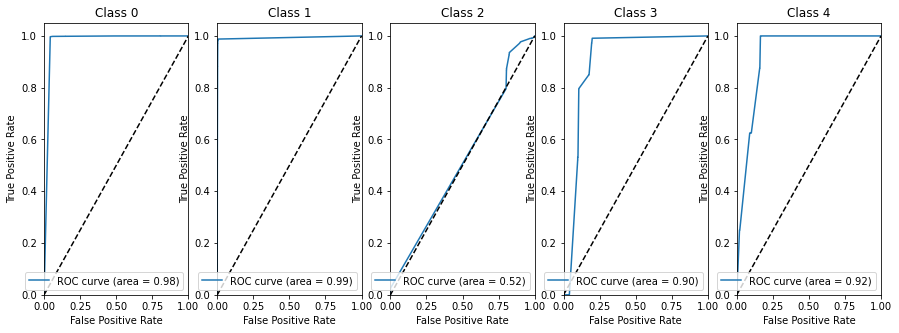

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_test_ROC = to_categorical(testY)

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_ROC[:, i], y_pred_class_weight[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(5)):
    plt.subplot(151+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

In [ ]:
print(roc_auc_score(y_test_ROC,y_pred_class_weight,average="macro",multi_class='raise'))

0.8625140267549174


# Result

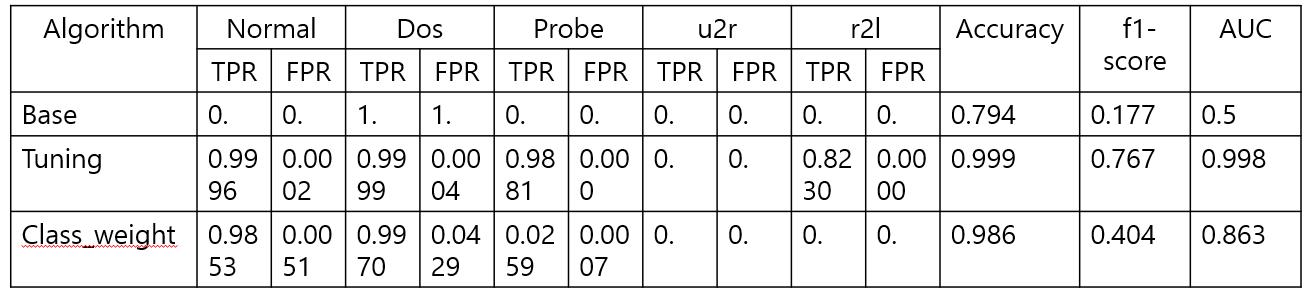

# Conclusion
* According to the paper, sufficient learning was achieved when 1000 epochs were run, but when epoch is set to 50, features and patterns  for classes except dos were not learned properly. This can be inferred from the result that both tpr and fpr of the dos class are 1 and values for other classes are 0.
* In the case of the model with hyperparameter tuning, sufficient training has been achieved for classes except u2r.
* In the case of the weight balancing model, it showed better results for some classes (Dos, Normal, Probe) compared to the base model. However, the performance is lowered compared to the tuning model which does not apply class_weight.
* In the case of weight balancing, the performance for the majority class is inevitably decreased by giving weight to the minority class, but it is inferred that the learning rate for both the majority class and the minority class is low due to insufficient epoch.
* As a result, when applying 50 epochs, the model with hyperparameter tuning without class weights showed the best results even with lower epochs than base model.

# Reference

[1] R. Vinayakumar, K. P. Soman and P. Poornachandran, "Applying convolutional neural network for network intrusion detection," 2017 International Conference on Advances in Computing, Communications and Informatics (ICACCI), 2017, pp. 1222-1228, doi: 10.1109/ICACCI.2017.8126009.

[2] 박승균. (2021). 무선 네트워크 침입탐지를 위해 개선된 CNN 분석. 융복합지식학회논문지, 9(3), 147-154.

[3] Ji Hyunjunq, Kim Yonqhyun, Kim Donqhwa, Shin Donqkyoo, Shin Donqil. (2017). A Study on comparison of KDD CUP 99 and NSL-KDD using artificial neural network. 한국정보처리학회 학술대회논문집, 24(1), 211-213.